## Введение

Тема моего проета - **Катастрофы 20-го века** 

Датасет был выгружен с сайта *https://www.kaggle.com* и содержит в себе информацию по катастрофам с 2000 года по 2024. 

В своей работе я проанализирую то, какие катастрофы происходили чаще всего и где, какие были самыми продолжительными, а какие унесли больше всего жизней и еще много всего. Я уверена, что будет интересно посмотреть на результаты!


Сначала импортируем файл, и посмотрим как он выглядит в `python`:

In [420]:
import pandas as pd #Для работы я использовала библиотеку pandas, которая предназначена для обработки и анализа структурированных данных

In [13]:
#load the Exel file which has extension of .xlsx
data = pd.read_excel('disasters.xlsx')

In [15]:
data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [17]:
data.shape
#15780 – количество строчек.
#46 – количество столбцов.

(15780, 46)

## Удаление лишних данных

Исходный файл содержит много лишней информации, которая не используется в процессе работы кода и лишь отнимает время. Поэтому мы удалим ненужные столбцы:

In [39]:
#Для начала помотрим на названия столбцов
data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [ ]:
# Удалим ненужные столбцы
data = data.drop(columns="DisNo.") 
data = data.drop(columns="Historic")  
data = data.drop(columns="Classification Key")   
data = data.drop(columns="External IDs") 
data = data.drop(columns="ISO")   
data = data.drop(columns="Location")
data = data.drop(columns="OFDA/BHA Response")
data = data.drop(columns="Appeal")
data = data.drop(columns="Declaration")
data = data.drop(columns="AID Contribution ('000 US$)")
data = data.drop(columns="Magnitude")
data = data.drop(columns="Magnitude Scale")
data = data.drop(columns="Latitude")   
data = data.drop(columns="Longitude")
data = data.drop(columns="No. Affected")
data = data.drop(columns="Reconstruction Costs ('000 US$)")   
data = data.drop(columns="Reconstruction Costs, Adjusted ('000 US$)")   
data = data.drop(columns="Insured Damage ('000 US$)")   
data = data.drop(columns="Insured Damage, Adjusted ('000 US$)")  
data = data.drop(columns="Total Damage ('000 US$)") 
data = data.drop(columns="CPI")   
data = data.drop(columns="Admin Units")   
data = data.drop(columns="Entry Date")
data = data.drop(columns="Last Update")

In [367]:
data.info

<bound method DataFrame.info of       Disaster Group Disaster Subgroup Disaster Type Disaster Subtype  \
0            Natural    Climatological       Drought          Drought   
1            Natural    Climatological       Drought          Drought   
2            Natural    Climatological       Drought          Drought   
3      Technological         Transport          Road             Road   
4            Natural      Hydrological         Flood   Riverine flood   
...              ...               ...           ...              ...   
15775        Natural    Climatological       Drought          Drought   
15776        Natural    Climatological       Drought          Drought   
15777        Natural    Climatological       Drought          Drought   
15778        Natural    Climatological       Drought          Drought   
15779        Natural    Climatological       Drought          Drought   

      Event Name           Country                        Subregion    Region  \
0         

In [369]:
data.dtypes

Disaster Group                        object
Disaster Subgroup                     object
Disaster Type                         object
Disaster Subtype                      object
Event Name                            object
Country                               object
Subregion                             object
Region                                object
Origin                                object
Associated Types                      object
River Basin                           object
Start Year                           float64
Start Month                          float64
Start Day                            float64
End Year                             float64
End Month                            float64
End Day                              float64
Total Deaths                         float64
No. Injured                          float64
No. Homeless                         float64
Total Affected                       float64
Total Damage, Adjusted ('000 US$)    float64
dtype: obj

## Приступим к основной части проекта

In [438]:
subgroup = []
for index, row in data.iterrows():
    subgroup.append(row['Disaster Subgroup'])
def most_frequent(lst):
    """
    Find the most common Disaster Subgroup.
    """
    return max(set(lst), key=lst.count)

most_common = most_frequent(subgroup)
print(f"The most common Disaster Group is: {most_common}")

The most common Disaster Group is: Hydrological


In [440]:
subgroup = []
for index, row in data.iterrows():
    subgroup.append(row['Country'])
def most_frequent(lst):
    """
    Find the most common Country.
    """
    return max(set(lst), key=lst.count)

most_common = most_frequent(subgroup)
print(f"The country with the highest number of disasters is: {most_common}")

The country with the highest number of disasters is: China


In [442]:
subgroup = []
count = 0
for index, row in data.iterrows():
    subgroup.append(row['Start Year'])
def most_frequent(lst):
    """
    Find the most common year.
    """
    return max(set(lst), key=lst.count)
for i in range(len(subgroup)):
    if subgroup[i] == 2000.0:
       count += 1 
most_common = int(most_frequent(subgroup))
print(f"Year with the highest number of disasters is: {most_common}")
print('Number of disasters:', count)

Year with the highest number of disasters is: 2000
Number of disasters: 889


In [89]:
data['Total Deaths'] = data['Total Deaths'].fillna(0)

In [93]:
subgroup = []
count = 0
for index, row in data.iterrows():
    subgroup.append(row['Total Deaths'])
for i in range(len(subgroup)):
    count += subgroup[i]
print('Total number of deaths:', int(count))

Total number of deaths: 1623869


In [131]:
print('Longest disaser in years:',(data['End Year'] - data['Start Year']).max(), 'years')

Longest disaser in years: 5.0 years


In [444]:
(data['End Year'] - data['Start Year']).argmax() #Находим порядковый номер самой динной катастрофы

12743

In [446]:
data.iloc[12743] #Выводим данные об этой катастрофе

Disaster Group                                               Natural
Disaster Subgroup                                     Climatological
Disaster Type                                                Drought
Disaster Subtype                                             Drought
Event Name                                                       NaN
Country                                                      Uruguay
Subregion                            Latin America and the Caribbean
Region                                                      Americas
Origin                                         Lack of rain, La Nina
Associated Types                                                 NaN
River Basin                                                      NaN
Start Year                                                    2018.0
Start Month                                                      1.0
Start Day                                                        NaN
End Year                          

In [448]:
data.iloc[12743]['End Month'] - data.iloc[12743]['Start Month'] #Находим, сколько месяцев прошло после последнего круглого значения года

0.0

In [163]:
print('Longest disaser:',(data['End Year'] - data['Start Year']).max(), 'years', data.iloc[12743]['End Month'] - data.iloc[12743]['Start Month'], 'months')

Longest disaser: 5.0 years 0.0 months


In [450]:
data["Total Damage, Adjusted ('000 US$)"].max() #Находим, какой самый большой ущерб в 1000 US$ нанесла одна катастрофа

284465151.0

In [452]:
data["Total Damage, Adjusted ('000 US$)"].argmax() #Узнаем порядковый номер этой катастрофы

8403

In [454]:
data.iloc[8403] #Выводим информацию об этой катастрофе

Disaster Group                                         Natural
Disaster Subgroup                                  Geophysical
Disaster Type                                       Earthquake
Disaster Subtype                                       Tsunami
Event Name                                                 NaN
Country                                                  Japan
Subregion                                         Eastern Asia
Region                                                    Asia
Origin                                                     NaN
Associated Types                     Fire|Industrial accidents
River Basin                                                NaN
Start Year                                              2011.0
Start Month                                                3.0
Start Day                                                 11.0
End Year                                                2011.0
End Month                                              

In [456]:
data.loc[(data['Country'] == 'Japan') & (data['Disaster Type'] == 'Earthquake')] #Узнаем, сколько в Японии было зафиксированных землетрясений за 21 век

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,Subregion,Region,Origin,Associated Types,...,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Homeless,Total Affected,"Total Damage, Adjusted ('000 US$)"
392,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,NaN,...,7.0,1.0,2000.0,7.0,1.0,1.0,NaN,NaN,100.0,NaN
610,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,"Slide (land, mud, snow, rock)",...,10.0,6.0,2000.0,10.0,6.0,0.0,130.0,312.0,7132.0,884732.0
1012,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,NaN,...,3.0,24.0,2001.0,3.0,24.0,2.0,161.0,NaN,11261.0,860415.0
2790,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,"Fire|Slide (land, mud, snow, rock)",...,5.0,26.0,2003.0,5.0,26.0,0.0,143.0,NaN,2303.0,385933.0
2883,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,"Slide (land, mud, snow, rock)",...,7.0,25.0,2003.0,7.0,25.0,0.0,569.0,219.0,18191.0,680765.0
3013,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,Fire|Tsunami/Tidal wave,...,9.0,25.0,2003.0,9.0,25.0,2.0,773.0,NaN,773.0,932532.0
3823,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,"Fire|Slide (land, mud, snow, rock)",...,10.0,23.0,2004.0,10.0,23.0,40.0,3183.0,NaN,62183.0,45168877.0
4181,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,"Slide (land, mud, snow, rock)",...,3.0,20.0,2005.0,3.0,20.0,1.0,735.0,NaN,3535.0,624096.0
4252,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,"Slide (land, mud, snow, rock)",...,4.0,19.0,2005.0,4.0,19.0,0.0,58.0,NaN,895.0,NaN
5769,Natural,Geophysical,Earthquake,Ground movement,NaN,Japan,Eastern Asia,Asia,NaN,"Slide (land, mud, snow, rock)|Tsunami/Tidal wave",...,3.0,25.0,2007.0,3.0,25.0,1.0,359.0,40668.0,41027.0,367389.0


In [460]:
data["Total Deaths"].max() #Находим, сколько максимально было смертей за одну катасрофу

222570.0

In [462]:
data["Total Deaths"].argmax() #Узнаем порядковый номер данной катастрофы

7663

In [468]:
data.iloc[7663] #Выводим информацию об этой катастрофе

Disaster Group                                               Natural
Disaster Subgroup                                        Geophysical
Disaster Type                                             Earthquake
Disaster Subtype                                     Ground movement
Event Name                                                       NaN
Country                                                        Haiti
Subregion                            Latin America and the Caribbean
Region                                                      Americas
Origin                                                           NaN
Associated Types                                                 NaN
River Basin                                                      NaN
Start Year                                                    2010.0
Start Month                                                      1.0
Start Day                                                       12.0
End Year                          

In [470]:
data.loc[(data['Disaster Subgroup'] == 'Transport') & (data['Total Deaths'] > 1000)] #Находим информацию о катастрофах с количеством смертей > 1000

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,Subregion,Region,Origin,Associated Types,...,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Homeless,Total Affected,"Total Damage, Adjusted ('000 US$)"
2254,Technological,Transport,Water,Water,"Ferry ""Joola""",Gambia,Sub-Saharan Africa,Africa,NaN,NaN,...,9.0,26.0,2002.0,9.0,26.0,1863.0,NaN,NaN,64.0,NaN
4962,Technological,Transport,Water,Water,"Ferry ""Al-Salam 98""",Egypt,Northern Africa,Africa,NaN,NaN,...,2.0,2.0,2006.0,2.0,3.0,1028.0,NaN,NaN,387.0,NaN


In [472]:
data['Disaster Subgroup'].value_counts() #Находим, сколько в каждой группе катастроф было зафиксированных случаев

Disaster Subgroup
Hydrological              4530
Transport                 3912
Meteorological            3067
Miscellaneous accident     923
Biological                 923
Industrial accident        902
Geophysical                804
Climatological             718
Extra-terrestrial            1
Name: count, dtype: int64

In [474]:
years = data['Start Year'].value_counts() 
print(years) #Выводим количчество катастроф по каждому году

Start Year
2000.0    889
2002.0    855
2005.0    844
2001.0    761
2003.0    752
2004.0    749
2006.0    748
2007.0    715
2010.0    654
2008.0    648
2009.0    611
2011.0    593
2015.0    580
2019.0    554
2012.0    550
2013.0    530
2014.0    526
2016.0    507
2017.0    506
2022.0    504
2021.0    491
2023.0    484
2018.0    461
2020.0    445
2024.0    125
Name: count, dtype: int64


In [476]:
df = pd.DataFrame({'name': ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], 'disasters': [889, 761, 855, 752, 749, 844, 748, 715, 648, 611, 654, 593, 550, 530, 526, 580, 507, 506, 461, 554, 445, 491, 504, 484, 125]})
print(df) #Выводим таблицу с отсортированными данными по количеству катастроф по годам (от 2000 года до 2024)

    name  disasters
0   2000        889
1   2001        761
2   2002        855
3   2003        752
4   2004        749
5   2005        844
6   2006        748
7   2007        715
8   2008        648
9   2009        611
10  2010        654
11  2011        593
12  2012        550
13  2013        530
14  2014        526
15  2015        580
16  2016        507
17  2017        506
18  2018        461
19  2019        554
20  2020        445
21  2021        491
22  2022        504
23  2023        484
24  2024        125


## Выводы

**Что мы теперь знаем о катастрофах 21-го века?**
1. В 21 веке произошло 15780 зафиксированных катастроф.
2. Самое большое их количество пришлось на 2000 год, тогда было зафиксировано 889 катастроф.
3. С годами количество катастроф уменьшалось.
4. Самый распространенный вид катастроф - гидрологический.
5. За весь 21 век из-за катастроф погибло 1623869 человек.
6. Самая длинная катастрофа длилась 5 лет (засуха в Уругвае).
7. Самая крупная по убыткам катастрофа произошла из-за землетрясения в Японии в 2011 году. Ущерб оценивается более чем в 284 миллиардов долларов.
8. За весь 21 век в Японии зафиксировано 30 катастроф, связанных с землетрясениями.
9. По числу жертв самой крупной катастрофой 21 века стало землетрясение на Гаити в 2010 году, когда погибло 222570 человек, а пострадало 3700000.
10. Самые крупные транспортные катастрофы были связаны с паромами. В 2002 году у берегов Гамбии затонуло судно, на котором погибло 1863 человек.

*Также были построены 3 столбчатые диаграммы*

## Диаграммы


Axes(0.125,0.11;0.775x0.77)


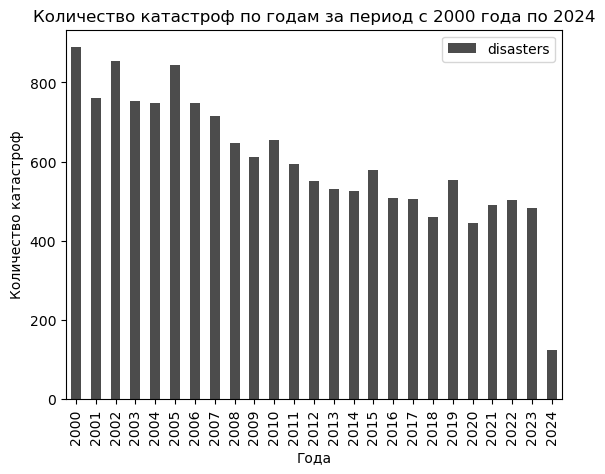

In [529]:
ax = df.plot.bar('name', 'disasters', color='k', alpha=0.7)
# Редактирование уже созданного графика с помощью matplotlib
ax.set_xlabel('Года')
ax.set_ylabel('Количество катастроф')
ax.set_title('Количество катастроф по годам за период с 2000 года по 2024')
print(ax) 


На данной диаграмме можно заметить, что самое большое количество катастроф произошло в Китае, затем идет Индия и США. (Ось x - страны, ось y - количество катастроф)

Axes(0.125,0.11;0.775x0.77)


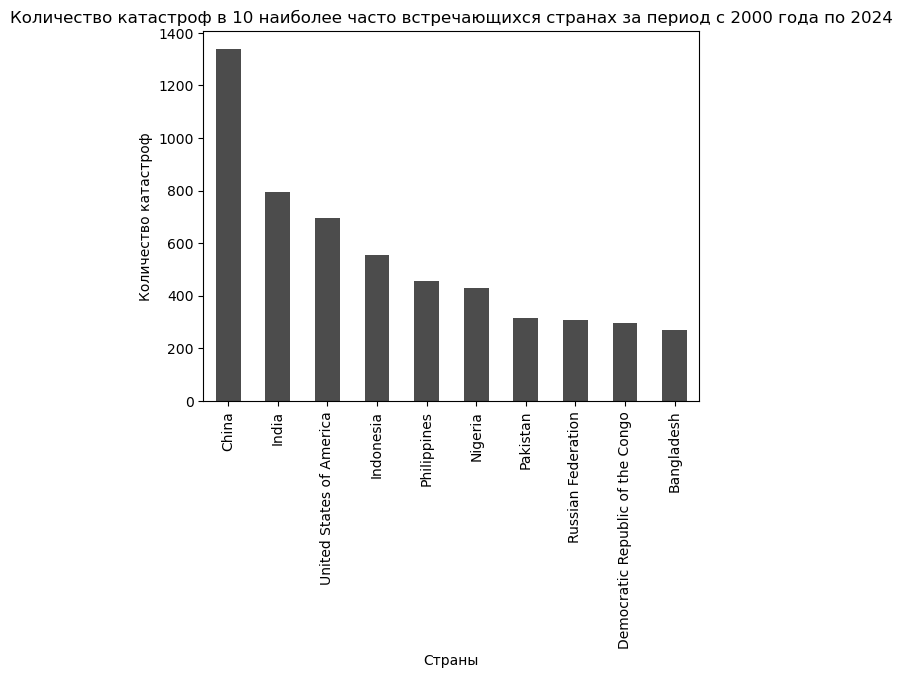

In [413]:
countries = data['Country'].value_counts().head(10)
con = countries.plot.bar(color='k', alpha=0.7)
con.set_xlabel('Страны')
con.set_ylabel('Количество катастроф')
con.set_title('Количество катастроф в 10 наиболее часто встречающихся странах за период с 2000 года по 2024')
print(con)

На данной диаграмме можно заметить, что самое большое количество катастроф приходится на категорию гидрологические. (Ось x - категории, ось y - количество катастроф)

Axes(0.125,0.11;0.775x0.77)


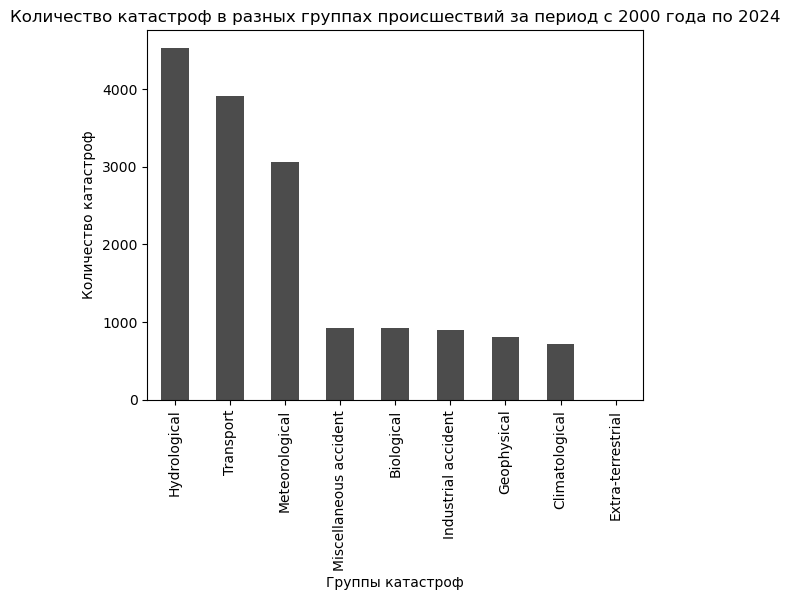

In [417]:
disasters = data['Disaster Subgroup'].value_counts()
group = disasters.plot.bar(color='k', alpha=0.7)
group.set_xlabel('Группы катастроф')
group.set_ylabel('Количество катастроф')
group.set_title('Количество катастроф в разных группах происшествий за период с 2000 года по 2024')
print(group)

## Заключение
Я надеюсь, что моя работа открыла вам глаза на что-то новое. Например, для меня самым удивительным было то, что с каждым годом количество катастроф уменьшается. Этот факт не может не радовать!

С любовью, Олеся, создатель данного проета❤️
